In [5]:
import warnings

warnings.simplefilter('ignore')
from datetime import date
start_date = date(2017, 1, 11)
end_date = date( 2021, 9, 17)

instrument_name = 'LICHSGFIN.NS'

In [6]:
from data import get_stock_data
data = get_stock_data( instrument_name, start_date, end_date)
len(data)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2017-01-11,474.541775,483.277583,473.500694,482.372314,4172550
2017-01-12,484.635512,486.129227,473.727036,475.809143,4378207
2017-01-13,478.841784,483.594444,472.550157,480.290192,3315463
2017-01-16,480.833437,492.285051,480.380802,489.795563,6422541
2017-01-17,493.688115,496.630237,478.932250,481.512299,6961054
...,...,...,...,...,...
2021-09-09,409.060659,418.613572,403.867805,410.579315,6628482
2021-09-13,412.489885,413.420694,407.786924,411.069183,3346927
2021-09-14,411.510103,413.420698,408.717707,411.118195,1971764


In [7]:
# get_stock_data??
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



##### Examples
- penny stocks
- Low liquidity
- High Volatility
- Remove stock which went through M & A

In [8]:
# Strategies
# If the 2 day MA> than 7 days MA - buy and vice versa


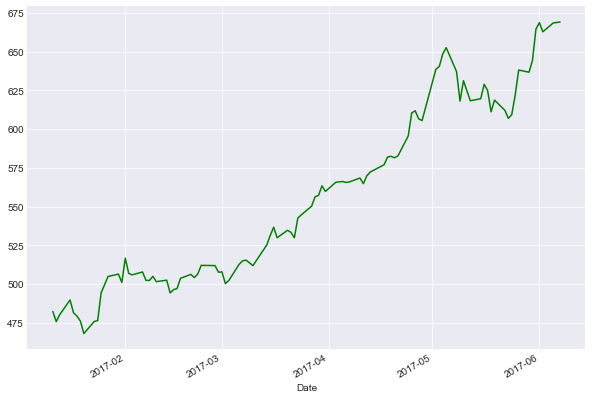

In [9]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
t = 100
data['Close'][:t].plot(figsize=(10, 7), color ='green')
plt.show()

In [10]:
import talib as tb
from alpha import ma_crossover , compute_adx
import numpy as np
short_lookback = 2
long_lookback=7

In [12]:
data = ma_crossover(data, short_lookback, long_lookback)

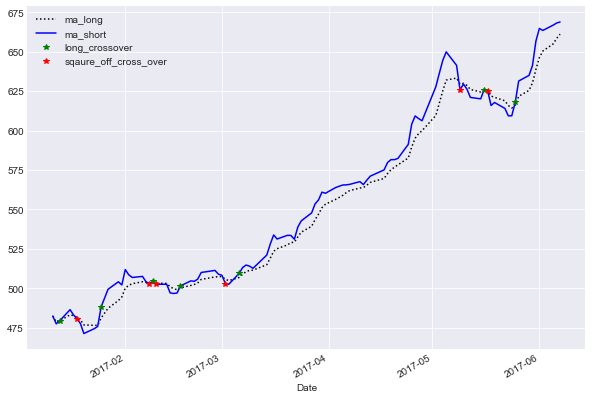

In [13]:
data.ma_long[:t].plot(figsize=(10, 7), style = 'k:')
data.ma_short[:t].plot(figsize = (10, 7), color = 'blue')
data['long_crossover'] = np.where((data.ma_short >= data.ma_long) &(data.ma_short.shift(1)< data.ma_long.shift(1)), data.ma_short, np.nan)

data.long_crossover[:t].plot(style = ['g*'], figsize = (10, 7))
data['sqaure_off_cross_over'] = np.where((data.ma_short <= data.ma_long) & (data.ma_short.shift(
    1) > data.ma_long.shift(1)), data.ma_short, np.nan)
data.sqaure_off_cross_over[:t].plot(style=['r*'], figsize=(10, 7))

plt.legend()
plt.show()




In [14]:
data = compute_adx(data , 20)

In [15]:
#step : Analyzing Performance
# Define final signal

In [16]:
data['signal'] = data['ma_signal'] * data['adx_signal']

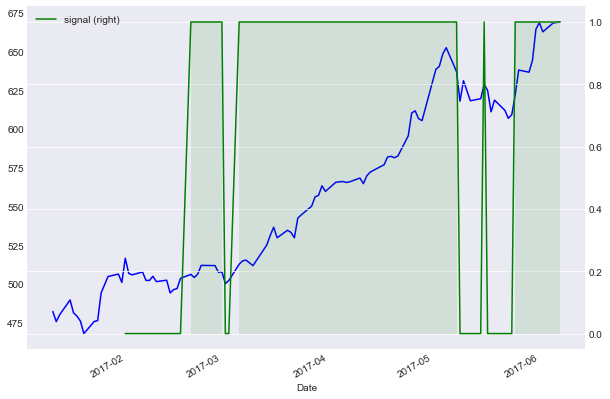

In [24]:
x = 100
data.Close[:t].plot(figsize=(10, 7),color='blue')
data.signal[:t].plot(figsize=(10, 7),secondary_y=True,style='green')
plt.fill_between(data.Close[:t].index, 0, 1,  
                 where=(data.signal[:t]>0) , color = 'green', alpha = 0.1, lw=0)

plt.legend()
plt.show()

In [18]:
# data.Close

In [19]:
from performance_analytics import compute_ret
data = compute_ret(data)

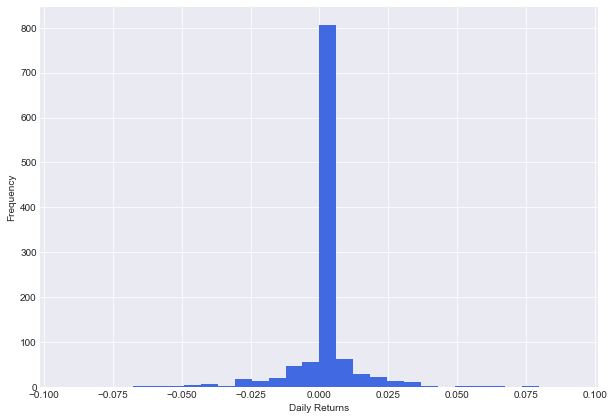

In [20]:
data.strategy_ret.hist(bins=30,figsize=(10,7),color='royalblue')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()


In [21]:
#cumulative Strategy return

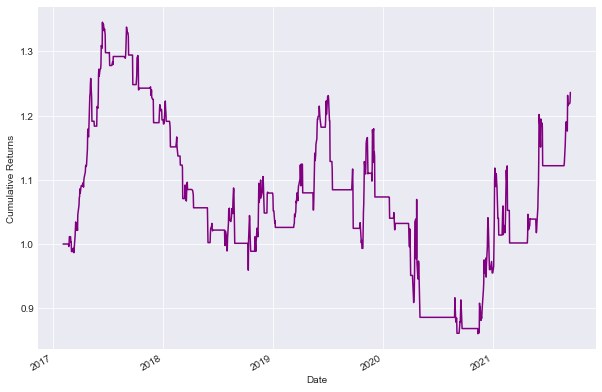

In [22]:
(data.strategy_ret + 1.0).cumprod().plot(figsize=(10,7),color='purple')
plt.ylabel('Cumulative Returns')
plt.show()

Start date,2017-01-11
End date,2021-09-16
Total months,55
,Backtest
Annual return,4.7%
Cumulative returns,23.6%
Annual volatility,21.3%
Sharpe ratio,0.33
Calmar ratio,0.13
Stability,0.25
Max drawdown,-36.0%


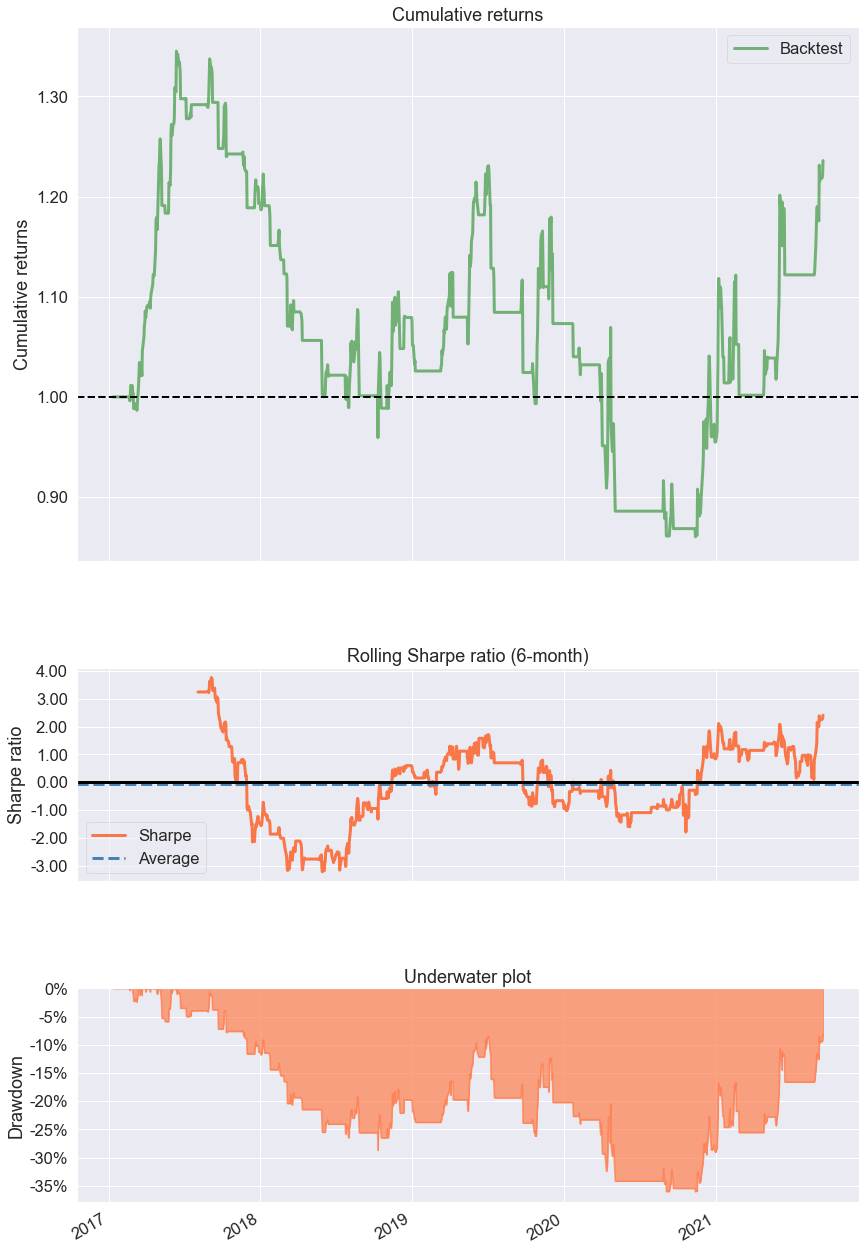

In [23]:
import pyfolio as pf
pf.create_simple_tear_sheet(data.strategy_ret)

In [25]:
# 1. How to reduce the drawdowns?
# 2. How to improve the strategy performance?
# 3. How to increase the Sharpe ratio?

In [26]:
instrument_list = [
    'LICHSGFIN.NS',
    'HDFCBANK.NS',
    'ASIANPAINT.NS',
    'BAJFINANCE.NS',
    'POWERGRID.NS',
    'RELIANCE.NS',
    'KOTAKBANK.NS',
    'NESTLEIND.NS',
    'AMBUJACEM.NS',
    'BHARTIARTL.NS',
    'TCS.NS',
    'INFY.NS',
    'WIPRO.NS',
    'BPCL.NS',
    'ITC.NS',
    'MARUTI.NS',
    'TATASTEEL.NS'
]


In [27]:
from data import get_stock_data
from alpha import ma_crossover, compute_adx
import pandas as pd
from performance_analytics import compute_ret

short_lookback = 2
long_lookback = 7

portfolio = pd.DataFrame()

for instrument_name in instrument_list:
    try:
        # Fetch data
        data = get_stock_data(instrument_name, start_date, end_date)
        data = ma_crossover(data, short_lookback, long_lookback)
        data = compute_adx(data, 20)
        #print(instrument_name, data.iloc[-1])

        # Alphas
        data = data.dropna()
        data['signal'] = data['ma_signal'] * data['adx_signal']

        # Calculate the returns
        data = compute_ret(data)
        portfolio['ret_'+instrument_name] = data.strategy_ret
    except Exception as e:
        print(e, instrument_name)

portfolio.iloc[-5:, :5]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,ret_LICHSGFIN.NS,ret_HDFCBANK.NS,ret_ASIANPAINT.NS,ret_BAJFINANCE.NS,ret_POWERGRID.NS
Date,,,,,
2021-09-09,0.001434,-0.004948,0.002922,-0.004361,0.0
2021-09-13,0.001193,-0.000000,0.006186,0.002005,0.0
2021-09-14,0.000119,-0.000000,-0.001351,-0.003761,0.0
2021-09-15,0.002145,-0.000000,-0.003033,-0.000458,0.0
2021-09-16,0.012015,0.000000,-0.003043,-0.000000,0.0


In [28]:

portfolio['strategy_ret'] = portfolio.mean(axis=1)
portfolio.strategy_ret.head()

Date
2017-02-20         NaN
2017-02-21   -0.000650
2017-02-22    0.001091
2017-02-23    0.002681
2017-02-27   -0.001880
Name: strategy_ret, dtype: float64

Start date,2017-02-20
End date,2021-09-16
Total months,53
,Backtest
Annual return,9.0%
Cumulative returns,47.1%
Annual volatility,6.7%
Sharpe ratio,1.32
Calmar ratio,1.53
Stability,0.74
Max drawdown,-5.9%


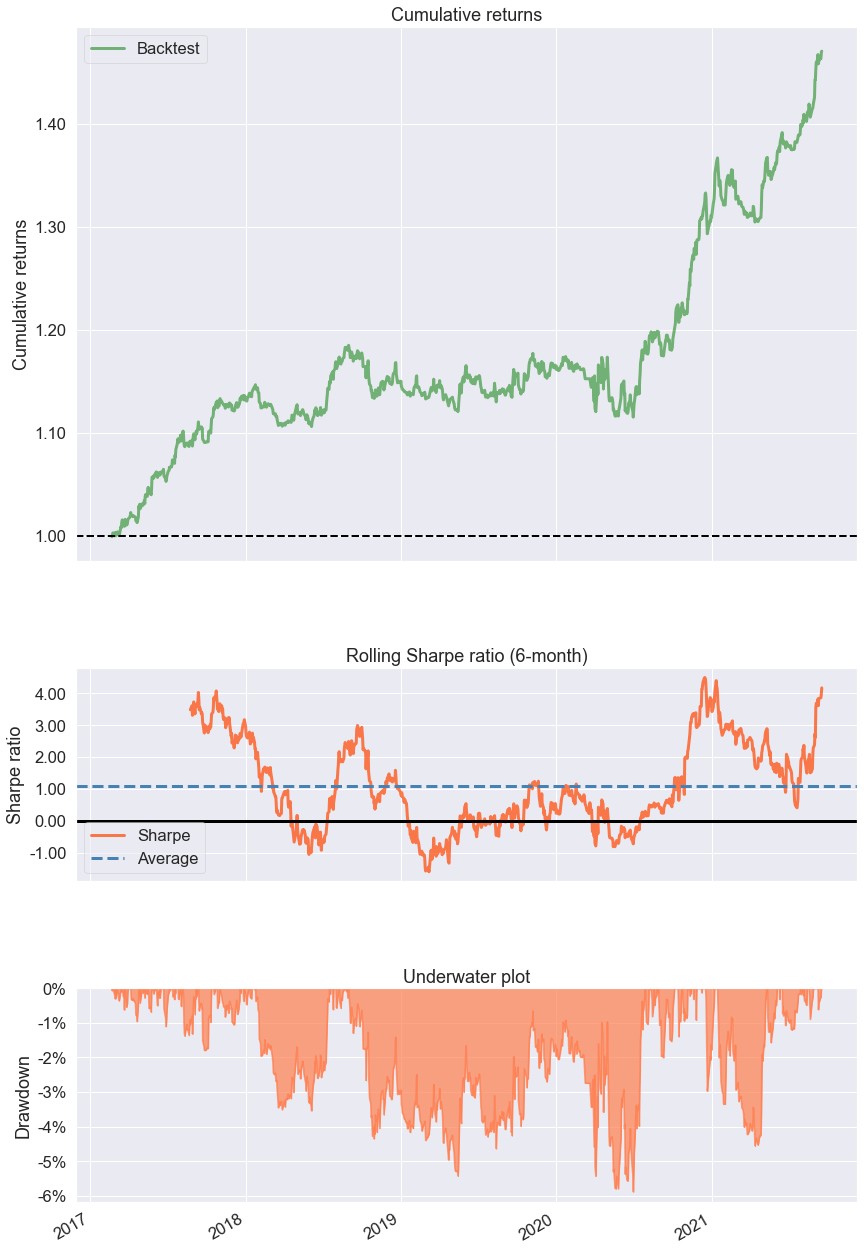

In [29]:
import pyfolio as pf
pf.create_simple_tear_sheet(portfolio.strategy_ret)

In [30]:
# Betting against beta

nifty_list = pd.read_csv('ind_nifty50list.csv')
nifty_list.head()

,Company Name,Industry,Symbol,Series,ISIN Code,ROE
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042,16.3
1,Ambuja Cements Ltd.,CEMENT & CEMENT PRODUCTS,AMBUJACEM,EQ,INE742F01042,10.0
2,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026,22.7
3,Aurobindo Pharma Ltd.,Pharma,AUROPHARMA,EQ,INE021A01026,20.0
4,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034,7.0


In [31]:
data = pd.read_csv('nifty_stocks_prices.csv' , index_col = 0)
data.index = pd.to_datetime(data.index)
data.tail()


,ADANIPORTS,AMBUJACEM,ASIANPAINT,AUROPHARMA,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BPCL,BHARTIARTL,INDUSTOWER,...,TATAMOTORS,TATASTEEL,TECHM,UPL,ULTRACEMCO,VEDL,WIPRO,YESBANK,ZEEL,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-09,749.700012,438.350006,3346.350098,741.750000,790.150024,3700.600098,7430.649902,456.064270,686.150024,242.300003,...,298.950012,1447.000000,1433.250000,757.900024,7939.649902,301.850006,662.349976,10.95,183.000000,17369.250000
2021-09-13,745.099976,436.250000,3367.050049,736.150024,788.349976,3699.550049,7445.549805,462.517792,693.299988,238.850006,...,301.200012,1463.449951,1429.500000,756.000000,7944.450195,308.549988,670.750000,11.10,186.850006,17355.300781
2021-09-14,755.400024,432.450012,3362.500000,748.049988,794.400024,3751.050049,7417.549805,457.874969,694.200012,246.250000,...,306.100006,1452.300049,1452.050049,752.500000,7856.450195,303.200012,673.450012,12.45,261.549988,17380.000000
2021-09-15,765.950012,437.049988,3352.300049,759.000000,791.400024,3779.100098,7414.149902,454.950012,725.500000,244.550003,...,311.950012,1455.099976,1464.849976,762.099976,7820.850098,307.200012,674.049988,12.70,255.899994,17519.449219
2021-09-16,769.650024,430.200012,3342.100098,754.750000,802.599976,3813.500000,7411.500000,439.049988,718.599976,269.350006,...,311.649994,1436.750000,1448.349976,754.000000,7765.450195,309.100006,667.849976,14.70,247.149994,17629.500000


In [32]:
data_pct_change = data.pct_change().dropna()
data_pct_change.tail()

,ADANIPORTS,AMBUJACEM,ASIANPAINT,AUROPHARMA,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BPCL,BHARTIARTL,INDUSTOWER,...,TATAMOTORS,TATASTEEL,TECHM,UPL,ULTRACEMCO,VEDL,WIPRO,YESBANK,ZEEL,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-09,0.003816,0.005505,0.002922,-0.002018,-0.005725,-0.006644,-0.004361,0.003268,0.027401,0.027348,...,0.012532,0.011994,0.003782,-0.005381,-0.006662,0.009701,0.000226,0.004587,0.031567,0.000908
2021-09-13,-0.006136,-0.004791,0.006186,-0.007550,-0.002278,-0.000284,0.002005,0.014150,0.010420,-0.014239,...,0.007526,0.011368,-0.002616,-0.002507,0.000605,0.022196,0.012682,0.013699,0.021038,-0.000803
2021-09-14,0.013824,-0.008711,-0.001351,0.016165,0.007674,0.013921,-0.003761,-0.010038,0.001298,0.030982,...,0.016268,-0.007619,0.015775,-0.004630,-0.011077,-0.017339,0.004025,0.121622,0.399786,0.001423
2021-09-15,0.013966,0.010637,-0.003033,0.014638,-0.003776,0.007478,-0.000458,-0.006388,0.045088,-0.006904,...,0.019111,0.001928,0.008815,0.012757,-0.004531,0.013193,0.000891,0.020080,-0.021602,0.008024
2021-09-16,0.004831,-0.015673,-0.003043,-0.005599,0.014152,0.009103,-0.000357,-0.034949,-0.009511,0.101411,...,-0.000962,-0.012611,-0.011264,-0.010628,-0.007084,0.006185,-0.009198,0.157480,-0.034193,0.006282


In [34]:
import statsmodels.api as sm


In [37]:
def calc_beta(y, x):
    model = sm.OLS(y, x)
    results = model.fit()
    return results.params[0]

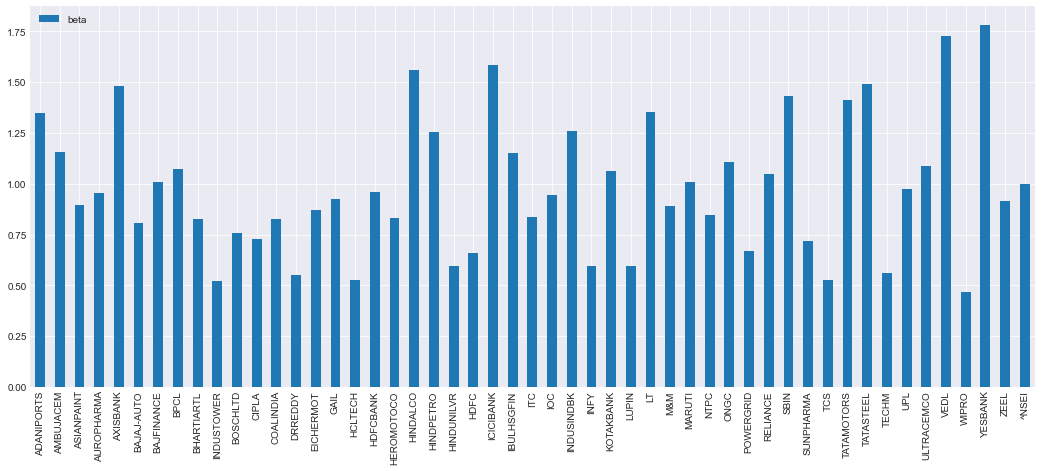

In [38]:
beta = pd.DataFrame(index=[0])
for ticker in data_pct_change.columns:
    beta[ticker] = calc_beta(data_pct_change.loc[:'2017',ticker],data_pct_change.loc[:'2017','^NSEI'])
beta = beta.T
beta.columns = ['beta']

bar_p = beta.plot.bar(figsize=(18,7))

plt.show()